Model A pseudo samples: [-27755946.98494895 -18338036.34895301 -22957552.33109843
 -16399665.68274623 -13461804.23095635 -14806139.35395007
 -19548863.0143595    1945611.81943021 -16896036.25913207
   1945611.81943021  -5661440.08672661   1945611.81943021
 -35836322.81351569 -16102087.91858933   1945611.81943021
   1945611.81943021   1945611.81943021 -20771346.49861807
   1945611.81943021 -40554584.63182914 -19336760.15465363
 -14626700.67274258   1945611.81943021  -8696669.68950433
 -15142190.30163174   1945611.81943021  -7360014.83333676
 -14789681.56285519   1945611.81943021   1945611.81943021
   1945611.81943021 -27579647.85849525   1945611.81943021
   1945611.81943021   1945611.81943021   1945611.81943021
   1945611.81943021   1945611.81943021 -12746018.63551609
   1945611.81943021   1945611.81943021 -20543440.16506219
 -46550574.40962748 -11921518.98108955 -14519506.13741418
 -34381651.04524776   1945611.81943021 -15223183.23243567
 -18356383.70132983   1945611.81943021   1945611

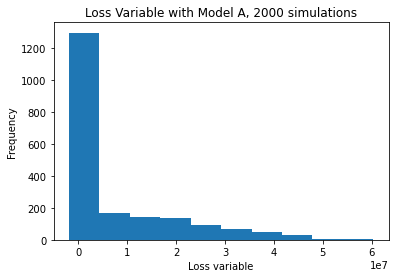

Model B pseudo samples: [  1945611.81943021   1945611.81943021   1945611.81943021
   -154274.11213808 -26317522.0272451   -4046772.68649863
   1945611.81943021   1945611.81943021   1945611.81943021
   1945611.81943021   1945611.81943021   1945611.81943021
 -17393128.38162645   1945611.81943021  -1472604.99882948
   1945611.81943021 -45644263.84796412   1945611.81943021
   1945611.81943021 -15654446.30278431 -25447443.20502893
   1945611.81943021  -5210689.75103519  -8203147.67756105
  -5182678.81188765   1945611.81943021   1945611.81943021
   1945611.81943021   1945611.81943021   1945611.81943021
   1945611.81943021   1945611.81943021 -20613505.60665214
  -1912159.25688068   1945611.81943021   1945611.81943021
   1945611.81943021 -13017075.16309111   1945611.81943021
 -15377847.98135161   1945611.81943021   1945611.81943021
 -29576794.52538515 -42344866.18153617   1945611.81943021
   1945611.81943021   1945611.81943021 -23406994.38936997
   1945611.81943021 -10595066.9511562  -16141955

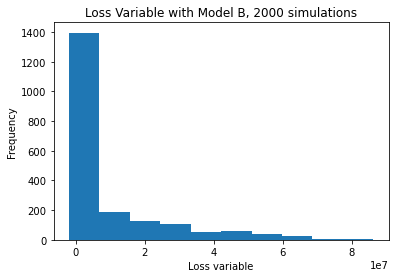

Model A, Xs =  44288711.53622213
Model A, Xr =  49904822.90812877
Model B, Xs =  43710046.59583014
Model B, Xr =  51068749.31882496
Model A, CVaR =  22529322603.402027
Model B, CVaR =  32546838924.87283


In [4]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import sys
from scipy.stats import norm
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)


### Question 1 ###


### part a ###

# Simulate put option values at maturity
# S0 - initial stock price
# K - strike price
# n_sim - number of pseudo-samples
# model - model type of stock behaviour (0 for model A, 1 for model B)
def putopt(S0, K, n_sim, model):
    
    # price of stock at T = 0, with n_sim pseudo-samples
    stock_vec = np.ones(n_sim)*S0;
    
    # if model is A, Z is a standard normal R.V, otherwise it is a laplace R.V
    # Z is a vector that contains n_sim simulations of the respective R.V
    Z = 0;
    U = np.random.uniform(0,1,n_sim);
    
    if (model == 0):
        Z = norm.ppf(U);
    else:
        test = (U <= 1/2);
        Z = (test * np.log(2*U)) + ((1-test) * -np.log(2*(1-U)));
        
    
    # price of stock at T = 1, with n_sim pseudo-samples
    stock_vec = stock_vec * np.exp(0.06 + 0.3*Z);
    
    # stock value at T = 1, with 1000000 put options
    stock_value = np.maximum(K - stock_vec, 0) * 1000000;
    
    return stock_value


# Model A loss variable with 2000 simulations at T = 1
profit_model_a = np.ones(2000)*1860000*np.exp(0.045) - putopt(100,100,2000,0);
loss_model_a = -profit_model_a;
print("Model A pseudo samples:", profit_model_a);

# Histogram of loss variable for model A
plt.hist(loss_model_a)
plt.title("Loss Variable with Model A, 2000 simulations")
plt.xlabel("Loss variable")
plt.ylabel("Frequency")
plt.show()

# Model B loss variable with 2000 simulations at T = 1
profit_model_b = 1860000*np.exp(0.045) - putopt(100,100,2000,1);
loss_model_b = -profit_model_b;
print("Model B pseudo samples:", profit_model_b);

# Histogram of loss variable for model B
plt.hist(loss_model_b)
plt.title("Loss Variable with Model B, 2000 simulations")
plt.xlabel("Loss variable")
plt.ylabel("Frequency")
plt.show()


### part b ###

# From the calculations we found that:
# Model A: s = 1971, r = 1988
# Model B: s = 1966, r = 1993

# Model A
loss_model_a_noprofit = np.maximum(loss_model_a,0)
sort_model_a = np.sort(loss_model_a)

print("Model A, Xs = ", sort_model_a[1970])
print("Model A, Xr = ", sort_model_a[1992]) 

# Model B
loss_model_b_noprofit = np.maximum(loss_model_b,0)
sort_model_b = np.sort(loss_model_b)

print("Model B, Xs = ", sort_model_a[1966])
print("Model B, Xr = ",sort_model_a[1993])


### part c ###

# From calculation we must find summation of Xi for all i = [1980,2000]
# then CVaR = 1/21 * sigma(Xi)

# Model A
model_a_cvar = 0;

for i in np.arange(1979,2000,1):
    model_a_cvar += sort_model_a[i];
    
model_a_cvar /= 1/21
print("Model A, CVaR = ", model_a_cvar)

# Model B
model_b_cvar = 0;

for i in np.arange(1979,2000,1):
    model_b_cvar += sort_model_b[i];
    
model_b_cvar /= 1/21   
print("Model B, CVaR = ", model_b_cvar)

Comments on part (b)

Based on both confidence intervals for Model A and B, they look to have a high range which suggests that the confidence intervals has low accuracy. 